In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union
from ipywidgets import interact

In [3]:
#1
def scale_matrix(matrix: np.ndarray)-> tuple:
    '''
    The fuction takes a bi-dimensional matrix as parameter and scales it on interval [0,1].
    The function returns a tuple containing the scaled matrix and two arrays filled with 
    the minimum and the maximum values on each column.
    
    Parameters
    ----------
    matrix : ndarray
        A bi-dimensional matrix represented by a numpy.ndarray.
    
    Returns
    -------
    tuple
        The scaled matrix and two arrays with the minimum/maximum values on columns.
    
    '''
    #minimum on columns
    min_col = matrix.min(axis = 0)
    
    #maximum on columns
    max_col = matrix.max(axis = 0)
    
    #determine constant columns by checking if all elements on column are equal
    #bool array representing the non-constant columns
    bool_col = np.logical_not(np.all(matrix == matrix[0,:], axis = 0))
    
    #scale each element of matrix (except elements on constant columns)
    matrix[:, bool_col] = (matrix[:, bool_col] - min_col[bool_col]) / (max_col[bool_col] - min_col[bool_col])
    
    #return a tuple
    return matrix, min_col, max_col
   
matrix = np.array([[1.0, 2.0, 3.0],[1.0, 4.0, 5.0], [1.0, 6.0, 7.0], [1.0, 8.0, 9.0]]) 
print('Initial matrix:')
print(matrix)
matrix, min_col, max_col = scale_matrix(matrix)
print('Minimum values on column:', min_col)
print('Maximum values on column:', max_col)
print('Scaled matrix:')
print(matrix)

Initial matrix:
[[1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
Minimum values on column: [1. 2. 3.]
Maximum values on column: [1. 8. 9.]
Scaled matrix:
[[1.         0.         0.        ]
 [1.         0.33333333 0.33333333]
 [1.         0.66666667 0.66666667]
 [1.         1.         1.        ]]


In [4]:
#2
def extend_matrix(matrix: np.ndarray, value: Union[int, float, str] = 1):
    '''
    The function takes a bi-dimensional matrix as a parameter and inserts a column of ones at the beginning.
    The function returns a matrix with an extra column.
    
    Parameters
    ----------
    matrix : ndarray
        A bi-dimensional matrix represented by a numpy.ndarray.
    
    value : Union[int, float, str]
        The value of the elements on the inserted column, which can be of any type of those mentioned.
    
    Returns
    -------
    ndarray
        The extended matrix.
        
    '''
    matrix = np.insert(matrix, 0, value, axis = 1)
    return matrix
    
matrix = np.array([[2, 3, 4],[5, 6, 7], [8, 9, 10], [11, 12, 13]]) 
print('Initial matrix:')
print(matrix)
matrix = extend_matrix(matrix)
print('Extended matrix:')
print(matrix)

Initial matrix:
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]
 [11 12 13]]
Extended matrix:
[[ 1  2  3  4]
 [ 1  5  6  7]
 [ 1  8  9 10]
 [ 1 11 12 13]]


In [5]:
# Preprocessing input data
input_data = pd.read_csv('winequality-white.csv', sep=';')
data = input_data.values
X = data[:,:-1]
Y = data[:,-1]

print(X)
print()
print(Y)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]

[6. 6. 6. ... 6. 7. 6.]


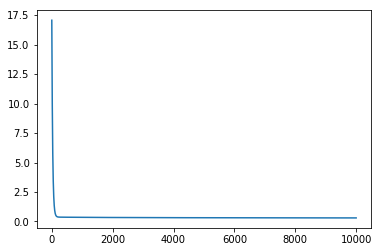

In [24]:
#3
def gradient_descent(X, Y, alpha, max_iterations):
    N = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    current_iteration = 0
    error_list = []
    
    for current_iteration in range(max_iterations):
        #update theta 
        new_theta = theta - alpha * 1 / N * ((X.dot(theta).T - Y).dot(X).T)
        
        if np.allclose(new_theta, theta):
            break;
        else:
            theta = new_theta
            
        #calculate error function values
        current_value = 1 / (2 * N) * np.sum((X.dot(theta).T - Y) ** 2)
        error_list.append(current_value)
        
    return theta, error_list

alpha = 0.01
max_iterations = 10000
X_scaled, min_col, max_col = scale_matrix(X)
X_extended = extend_matrix(X_scaled)

theta, error_list = gradient_descent(X_extended, Y, alpha, max_iterations)

plt.plot(error_list)
plt.show()

In [9]:
#4

#Calculate theta coef
X_extended = extend_matrix(X)
theta = np.linalg.pinv(X_extended).dot(Y)
Y_predicted = X_extended.dot(theta)

#Print predicted value/actual value
print('predicted quality: ', Y_predicted)
print('actual quality: ', Y)

print()

#Calculate and print error function
N = X_extended.shape[0]
error_funct = 1 / (2 * N) * np.sum((X_extended.dot(theta).T - Y) ** 2)
print('Error:' + str(error_funct))

predicted quality:  [5.5626578  5.21687319 5.7664803  ... 5.34192079 6.57129362 6.3473428 ]
actual quality:  [6. 6. 6. ... 6. 7. 6.]

Error:0.2815770314943284


In [12]:
#5

#Random permutation
matrix = np.random.permutation(data)
matrix_scaled, min_col, max_col = scale_matrix(matrix)
matrix_extended = extend_matrix(matrix)

#Split in subsets
X_training = matrix_extended[:int(0.7 * len(X)), :-1]
X_testing = matrix_extended[int(0.7 * len(X)):, :-1]
Y_training = matrix_extended[:int(0.7 * len(Y)), -1]
Y_testing = matrix_extended[int(0.7 * len(Y)):, -1]

#Build the model
alpha = 0.08
max_iterations = 10000
theta, error_list = gradient_descent(X_training, Y_training, alpha, max_iterations)

#Calculate the error function and print it
error_funct = 1 / (2 * N) * np.sum((X_training.dot(theta).T - Y_training) ** 2)

print('Error: ' + str(error_funct))

Error: 0.005575114135244631
